In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel(r"C:\Users\Dell\Desktop\Commercial Loan data.xlsx")

In [4]:
dataset.head(10)

,Account ID,Product,Sector,Region,Balance ($),Interest Rate we charge clients (%),"Interest Rate we pay Treasury for ""borrowing funds"" (%)"
0,205256,Operating Line,Health Care,Saskatchewan,3.402562e+05,3.450,3.6868
1,18206632,Revolving Term,Mining,Saskatchewan,6.425500e+07,3.550,3.6868
2,2508929,Operating Line,Banks,Quebec,5.574212e+06,3.637,3.8012
3,933997,Operating Line,Retail,Quebec,8.941601e+05,3.836,3.6868
4,3766238,Revolving Term,Hospitality,US,1.410413e+07,3.854,3.8012
5,2638890,Operating Line,Manufacturing,Quebec,6.430941e+06,3.868,3.8012
6,3185556,Operating Line,Health Care,Alberta,1.125750e+07,3.950,3.6868
7,2970174,Operating Line,Mining,Alberta,1.116211e+07,3.950,3.6868
8,1283520,Operating Line,Banks,Alberta,4.499832e+06,3.950,3.6868
9,474947,Operating Line,Retail,British Columbia,1.305969e+06,3.950,3.6868


# Basic Info

In [5]:
dataset.shape

(497, 7)

In [41]:
dataset.describe()

,Account ID,Balance ($),Interest Rate we charge clients (%),"Interest Rate we pay Treasury for ""borrowing funds"" (%)",Interest_Spread,Annual_Revenue,Revenue_Percentage
count,497.00,497.00,497.00,497.00,497.00,497.00,497.00
mean,"3,571,007.58","16,265,378.46",5.53,3.71,1.82,"377,617.79",0.20
std,"7,406,495.77","40,777,037.39",3.46,0.06,3.45,"2,029,510.42",1.08
min,"118,243.00",7.20,3.45,3.18,-0.24,"-87,900.84",-0.05
25%,"887,956.00","1,228,943.15",4.70,3.69,1.01,"13,513.38",0.01
50%,"1,530,888.00","4,950,000.00",5.20,3.69,1.51,"64,466.78",0.03
75%,"3,461,628.00","14,956,198.78",5.75,3.69,2.01,"239,630.61",0.13
max,"125,633,879.00","679,383,870.95",79.45,4.46,75.76,"41,515,706.90",22.12


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Account ID                                               497 non-null    int64  
 1   Product                                                  497 non-null    object 
 2   Sector                                                   497 non-null    object 
 3   Region                                                   497 non-null    object 
 4   Balance ($)                                              497 non-null    float64
 5   Interest Rate we charge clients (%)                      497 non-null    float64
 6   Interest Rate we pay Treasury for "borrowing funds" (%)  497 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.3+ KB


# checking for missing values

In [8]:
dataset.isnull().sum()

Account ID                                                 0
Product                                                    0
Sector                                                     0
Region                                                     0
Balance ($)                                                0
Interest Rate we charge clients (%)                        0
Interest Rate we pay Treasury for "borrowing funds" (%)    0
dtype: int64

# Fix typos in categorical columns

In [10]:
print(dataset['Region'].unique())

['Saskatchewan' 'Quebec' 'US' 'Alberta' 'British Columbia' 'Nova Scotia'
 'Ontario' 'Manitoba' 'Ab' 'New Brunswick' 'Ontaro' 'AB' 'BC'
 'Newfoundland and Labrador' 'ON' 'Yukon' 'Prince Edward Island']


In [12]:
dataset['Region'] = dataset['Region'].replace({'rtfish Columbia': 'British Columbia', 'Ab': 'Alberta', 'Ontaro': 'Ontario'})

In [13]:
print(dataset['Sector'].unique())

['Health Care' 'Mining' 'Banks' 'Retail' 'Hospitality' 'Manufacturing']


# Basic Exploration

In [39]:
print(dataset['Sector'].value_counts())
print(dataset['Product'].value_counts())

Sector
Health Care      83
Mining           83
Banks            83
Retail           83
Hospitality      83
Manufacturing    82
Name: count, dtype: int64
Product
Operating Line    342
Revolving Term    155
Name: count, dtype: int64


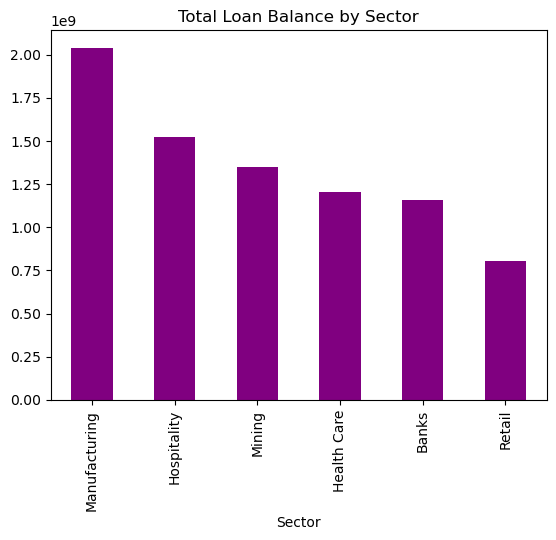

In [38]:
dataset.groupby('Sector')['Balance ($)'].sum().sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.title('Total Loan Balance by Sector')
plt.show()

# In depth Analysis & Feature Engineering

In [22]:
# Size Segment for each account
dataset['Client_Size'] = pd.cut(dataset['Balance ($)'], 
                            bins=[0, 100000, 1000000, 10000000, np.inf], 
                            labels=['Micro', 'Small', 'Medium', 'Large'])

In [24]:
dataset['Interest_Spread'] = dataset['Interest Rate we charge clients (%)'] - dataset['Interest Rate we pay Treasury for "borrowing funds" (%)']

In [37]:
# Calculate key financial metrics
dataset['Annual_Revenue'] = (dataset['Balance ($)'] * dataset['Interest_Spread']) / 100
dataset['Revenue_Percentage'] = (dataset['Annual_Revenue'] / dataset['Annual_Revenue'].sum()) * 100

In [36]:
# Q1: Which sector is the most profitable for us?
profitability_by_sector = dataset.groupby('Sector')[['Annual_Revenue', 'Balance ($)']].sum().sort_values('Annual_Revenue', ascending=False)
print(profitability_by_sector)

               Annual_Revenue      Balance ($)
Sector                                        
Hospitality     65,459,075.82 1,525,971,501.22
Manufacturing   37,144,471.23 2,039,984,439.47
Health Care     26,718,709.76 1,207,281,635.00
Mining          22,028,523.69 1,347,689,127.61
Banks           21,386,864.20 1,158,232,465.31
Retail          14,938,397.90   804,733,925.29


In [35]:
#Is there a relationship between client size and interest spread?
spread_by_size = dataset.groupby('Client_Size')['Interest_Spread'].mean()
print(spread_by_size)

Client_Size
Micro    1.80
Small    1.69
Medium   1.56
Large    2.17
Name: Interest_Spread, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_22584\451881195.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spread_by_size = dataset.groupby('Client_Size')['Interest_Spread'].mean()


In [34]:
#Which region has the highest concentration of risk (large balances)?
risk_by_region = dataset.groupby('Region')['Balance ($)'].sum().sort_values(ascending=False)
print("Risk by Region",risk_by_region)

Risk by Region Region
Ontario                     3,766,914,481.90
Quebec                      1,297,634,598.00
Alberta                     1,094,566,847.33
British Columbia              807,994,755.59
Saskatchewan                  431,287,190.04
Nova Scotia                   249,609,254.90
AB                            146,654,013.58
Manitoba                      121,506,981.20
BC                             78,504,904.95
US                             22,603,466.57
Newfoundland and Labrador      22,377,791.70
ON                             22,361,828.30
New Brunswick                  17,887,343.50
Prince Edward Island            3,584,840.00
Yukon                             404,796.35
Name: Balance ($), dtype: float64


In [30]:
dataset.head(5)

,Account ID,Product,Sector,Region,Balance ($),Interest Rate we charge clients (%),"Interest Rate we pay Treasury for ""borrowing funds"" (%)",Client_Size,Interest_Spread,Annual_Revenue,Revenue_Percentage
0,205256,Operating Line,Health Care,Saskatchewan,3.402562e+05,3.450,3.6868,Small,-0.2368,-805.726800,-0.000429
1,18206632,Revolving Term,Mining,Saskatchewan,6.425500e+07,3.550,3.6868,Large,-0.1368,-87900.840000,-0.046836
2,2508929,Operating Line,Banks,Quebec,5.574212e+06,3.637,3.8012,Medium,-0.1642,-9152.855579,-0.004877
3,933997,Operating Line,Retail,Quebec,8.941601e+05,3.836,3.6868,Small,0.1492,1334.086857,0.000711
4,3766238,Revolving Term,Hospitality,US,1.410413e+07,3.854,3.8012,Large,0.0528,7446.978200,0.003968


In [31]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [32]:
dataset

,Account ID,Product,Sector,Region,Balance ($),Interest Rate we charge clients (%),"Interest Rate we pay Treasury for ""borrowing funds"" (%)",Client_Size,Interest_Spread,Annual_Revenue,Revenue_Percentage
0,205256,Operating Line,Health Care,Saskatchewan,"340,256.25",3.45,3.69,Small,-0.24,-805.73,-0.00
1,18206632,Revolving Term,Mining,Saskatchewan,"64,255,000.00",3.55,3.69,Large,-0.14,"-87,900.84",-0.05
2,2508929,Operating Line,Banks,Quebec,"5,574,211.68",3.64,3.80,Medium,-0.16,"-9,152.86",-0.00
3,933997,Operating Line,Retail,Quebec,"894,160.09",3.84,3.69,Small,0.15,"1,334.09",0.00
4,3766238,Revolving Term,Hospitality,US,"14,104,125.38",3.85,3.80,Large,0.05,"7,446.98",0.00
...,...,...,...,...,...,...,...,...,...,...,...
492,6243318,Operating Line,Health Care,Quebec,"48,219,036.60",8.70,3.69,Large,5.01,"2,417,316.74",1.29
493,1664632,Revolving Term,Mining,US,"6,023,010.00",8.75,3.80,Medium,4.95,"298,066.72",0.16
494,565685,Operating Line,Banks,Alberta,"4,171,493.70",9.90,3.69,Medium,6.21,"259,183.25",0.14
495,2110270,Operating Line,Retail,Quebec,"14,093,700.00",10.00,3.80,Large,6.20,"873,640.28",0.47


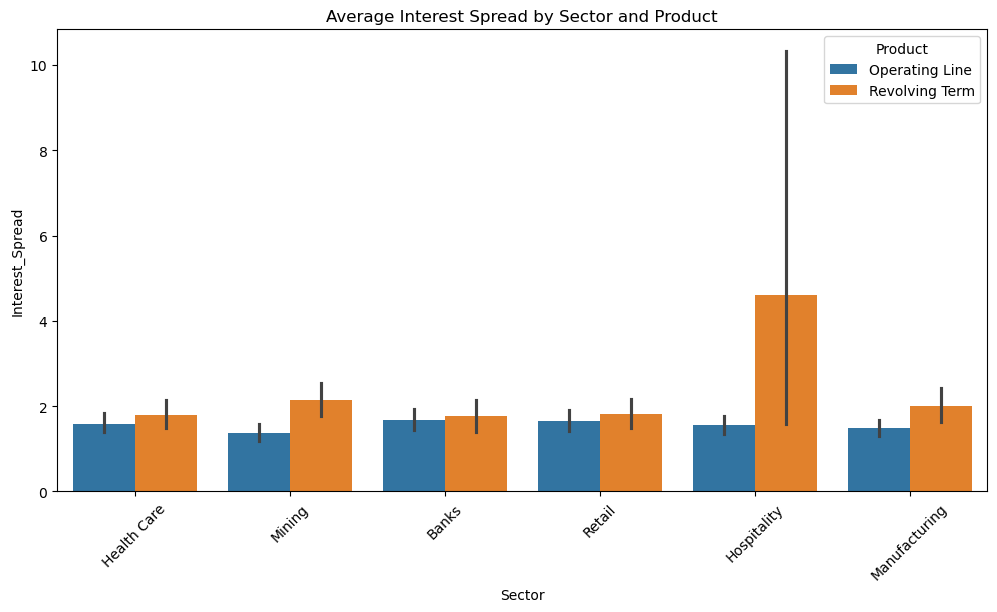

In [42]:
# Average spread by product and sector
plt.figure(figsize=(12, 6))
sns.barplot(data=dataset, x='Sector', y='Interest_Spread', hue='Product')
plt.xticks(rotation=45)
plt.title('Average Interest Spread by Sector and Product')
plt.show()

In [49]:
# Calculate loss-making loans
loss_making_loans = dataset[dataset['Annual_Revenue'] < 0]
loss_per_sector = loss_making_loans.groupby('Sector')['Annual_Revenue'].sum().sort_values()

print("Loss-Making Loans Summary:")
print(f"Number of loss-making loans: {len(loss_making_loans)}")
print(f"Total loss amount: ${loss_making_loans['Annual_Revenue'].sum():,.2f}")
print("\nLoss by Sector:")
print(loss_per_sector)

Loss-Making Loans Summary:
Number of loss-making loans: 3
Total loss amount: $-97,859.42

Loss by Sector:
Sector
Mining        -87,900.84
Banks          -9,152.86
Health Care      -805.73
Name: Annual_Revenue, dtype: float64


In [ ]:
# Visualization 1: Loss-making loans by sector
plt.figure(figsize=(10, 6))
loss_per_sector.plot(kind='bar', color='red')
plt.title('Total Loss Amount by Sector')
plt.xlabel('Sector')
plt.ylabel('Loss Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Basic Machine Learning - Customer Segmentation

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features that define a client's value/risk
cluster_data = dataset[['Balance ($)', 'Interest_Spread', 'Annual_Revenue']].copy()

# Scale the data so that no feature dominates others
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

0      0
1      0
2      0
3      0
4      0
      ..
492    0
493    0
494    0
495    0
496    1
Name: Cluster, Length: 497, dtype: int32


In [47]:
# Create 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(scaled_data)

# Analysis

In [48]:
cluster_summary = dataset.groupby('Cluster')[['Balance ($)', 'Interest_Spread', 'Annual_Revenue']].mean()
print(cluster_summary)

           Balance ($)  Interest_Spread  Annual_Revenue
Cluster                                                
0        10,040,128.16             1.65      168,309.49
1        54,796,665.00            75.76   41,515,706.90
2       123,366,276.63             2.06    2,590,606.69
3       679,383,870.95             1.76   11,978,896.41


# Cluster Analysis: Key Findings

*   🚨 **Cluster 1 (The Anomaly):** An implausible 75.76% spread indicates a critical **data error** requiring immediate investigation.

*   ⚠️ **Cluster 2 (The Whales):** Our largest clients ($123M avg) but with the lowest margin (2.06% spread). High **concentration risk**; a pricing review is advised.

*   ⭐ **Cluster 0 (The Core):** The healthy core of our portfolio. Balanced and reliable with a good average balance ($10M) and strong spread (1.65%).

*   💎 **Cluster 3 (The Gold Mine):** Our most valuable client, generating massive revenue ($12M). A **key strategic account** requiring utmost priority.

**Conclusion:** We must transition from managing a single portfolio to executing targeted strategies for these four distinct segments to optimize risk and profitability.

# Strategic Profitability Analysis of a Commercial Loan Portfolio

## 📌 Executive Summary  
This study evaluates the profitability, risk concentration, and strategic positioning of a commercial loan portfolio. Key metrics—interest spread, annual revenue, and client segmentation—were analyzed across sectors, regions, and client sizes to identify drivers of performance.

---

## 📊 Dataset Overview  
- **Records:** 497 loans  
- **Features:** Account ID, Product, Sector, Region, Balance, Interest Rates (charged & paid)  
- **Derived Metrics:** Interest Spread, Annual Revenue, Revenue %  

---

## 🔍 Key Findings  

### 1. Sector Profitability  

- **Hospitality** (most profitable)  
  - Annual Revenue: $65.5M  
  - Total Balance: $1.53B  

- **Manufacturing** (largest exposure)  
  - Annual Revenue: $37.1M  
  - Total Balance: $2.04B  

- **Health Care**  
  - Annual Revenue: $26.7M  
  - Total Balance: $1.21B  



---

### 2. Interest Spread by Client Size  
- **Large clients:** Highest spread (**2.17%**) → strongest profitability per loan.  
- **Micro clients:** Positive but lower spread (**1.80%**).  

| Client Size | Avg. Interest Spread |
|-------------|-----------------------|
| Large       | 2.17%                |
| Micro       | 1.80%                |
| Small       | 1.69%                |
| Medium      | 1.56%                |

---

### 3. Regional Concentration  
- **Ontario:** Dominates portfolio exposure (**$3.77B**).  
- **Quebec** and **Alberta** follow with significant balances.  

| Region  | Total Balance ($) |
|---------|--------------------|
| Ontario | 3.77B             |
| Quebec  | 1.30B             |
| Alberta | 1.09B             |

---

### 4. Negative Interest Spreads  
- Sectors like **Mining, Health Care, and Banks** show negative spreads—loans cost more to fund than they earn.  
- Indicates potential **revenue leakage** and **risk**.  

---

### 5. Product Distribution  
- **Operating Line loans** dominate (342 loans).  
- **Revolving Term loans** less common (155 loans).  

---

## 💡 Strategic Insights  
- **Expand Profitable Sectors:** Hospitality & Manufacturing drive highest revenue.  
- **Prioritize Large Clients:** Strongest spreads & relationship value.  
- **Manage Regional Risk:** Ontario’s dominance requires close monitoring.  
- **Address Negative Spreads:** Reprice or mitigate underperforming loans.  
- **Review Product Mix:** Optimize use of Revolving Term loans.  

---


In [ ]:
# df_final.to_csv("loan_portfolio_analysis.csv", index=False)